In [182]:
import pandas as pd
import numpy as np
import random
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
i = 1
print('day' + str(i) + '.txt') 

day1.txt


In [17]:
day1 = pd.read_csv('day1.txt', sep='delimiter', header=None, names=['text'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


## Read in data

In [127]:
def get_data(day_num):
    day_file_name = 'day' + str(day_num) + '.txt'
    #print(day_file_name)
    day_csv =  pd.read_csv(day_file_name, sep='delimiter', header=None, names=['text'])
    day_csv['day'] = day_num
    return day_csv

In [128]:
days = [i for i in range(1, 15)]
days.remove(6)
days

[1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14]

In [129]:
total_day_csv = None
for day_num in days:
    day_csv = get_data(day_num)
    #print(day_csv)
    total_day_csv = pd.concat([total_day_csv, day_csv])


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


### Tokenize

In [131]:
def tokenize_one_dataset(one_day_dataset):
    token_dataset = []
    word_count = 0
    dataset_tokenized = one_day_dataset.apply(lambda x: x.split(' '))
    for i in range(dataset_tokenized.shape[0]):
        tokens = [t.lower() for t in dataset_tokenized.iloc[i]]
        word_count += len(tokens)
        token_dataset += tokens
    return word_count, token_dataset

In [151]:
def tokenize_dataset(dataset, days):
    token_datasets = []
    all_tokens = []
    word_count_dict = {}
    for day_num in days:
        print(str(day_num))
        str_day_num = str(day_num)
        one_day_dataset = total_day_csv.loc[total_day_csv['day']==day_num]['text']
        word_count, token_dataset = tokenize_one_dataset(one_day_dataset)
        word_count_dict[str_day_num] = word_count
        token_datasets.append(token_dataset)
        all_tokens += token_dataset
    return token_datasets, all_tokens, word_count_dict

In [153]:
token_datasets, all_tokens, word_count_dict = tokenize_dataset(total_day_csv, days)

1
2
3
4
5
7
8
9
10
11
12
13
14


In [154]:
word_count_dict

{'1': 1061,
 '2': 1035,
 '3': 812,
 '4': 1010,
 '5': 928,
 '7': 1193,
 '8': 987,
 '9': 1129,
 '10': 993,
 '11': 936,
 '12': 473,
 '13': 828,
 '14': 1132}

['1', '2', '3', '4', '5', '7', '8', '9', '10', '11', '12', '13', '14']

In [180]:
list(word_count_dict.values())

[1061, 1035, 812, 1010, 928, 1193, 987, 1129, 993, 936, 473, 828, 1132]

In [ ]:
ax = sns.boxplot('Day', 'Count', data= gg)
ax.set_title('lalala')
ax.set_ylabel('lololo')

Text(0, 0.5, 'Word Count')

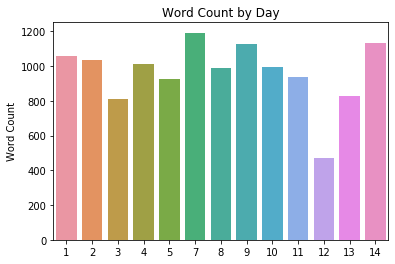

In [187]:
word_count_plot = sns.barplot(days,
            list(word_count_dict.values()))
word_count_plot.set_title('Word Count by Day')
word_count_plot.set_ylabel('Word Count')

In [188]:
word_count_plot.figure.savefig("word_count_plot.png")

## Build Vocab

In [155]:
from collections import Counter

max_vocab_size = 10000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token


In [156]:
token2id, id2token = build_vocab(all_tokens)

In [162]:
random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

Token id 1802 ; token cỡ
Token cỡ; token id 1802


In [165]:
print('Vocab size {}'.format(len(token2id)))

Vocab size 2411


In [167]:
token_counter = Counter(all_tokens)
vocab, count = zip(*token_counter.most_common(max_vocab_size))

In [175]:
vocab[:20]

('và',
 'tôi',
 'mình',
 'có',
 'không',
 'người',
 'là',
 'một',
 'của',
 'những',
 'đi',
 'cho',
 'bạn',
 'cũng',
 'khi',
 'về',
 'hay',
 'làm',
 'với',
 'mà')

In [174]:
vocab[-2]

'thôi,”'